Faizaan Ali
Homework 1

# Logistic Regression: MLE, MAP, and Practical Modeling


This notebook derives the Logistic Regression objective using Maximum Likelihood Estimation (MLE), and then extends the formulation to Maximum A Posteriori (MAP) estimation. Finally, it discusses a practical
machine learning problem where logistic regression is appropriate. Next, it connects the
mathematical derivation to a real dataset and outlines the underlying assumptions. Finally, there is an experiment to test different parameters and optimizers to compare various Logistic Regression setups, specifically within its gradient descent training algorithm.


## Logistic Regression Model

Let $\{(x_i, y_i)\}_{i=1}^n$ be a dataset where $x_i \in \mathbb{R}^d$ and
$y_i \in \{0,1\}$. Logistic regression models the conditional probability of
the label given the input as

$
P(y_i = 1 \mid x_i, w) = \sigma(w^\top x_i)
$

where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

### Likelihood Function

Assuming the samples are independent and identically distributed (i.i.d.),
the likelihood of the dataset is

$
\mathcal{L}(w) = \prod_{i=1}^n
\left(\sigma(w^\top x_i)\right)^{y_i}
\left(1 - \sigma(w^\top x_i)\right)^{1 - y_i}.
$

Taking the logarithm yields the log-likelihood

$
\ell(w) = \sum_{i=1}^n
\left[
y_i \log \sigma(w^\top x_i)
+ (1 - y_i)\log(1 - \sigma(w^\top x_i))
\right].
$

### MLE Objective

Maximum Likelihood Estimation seeks to maximize $\ell(w)$, which is equivalent
to minimizing the negative log-likelihood:

$
\mathcal{J}_{\text{MLE}}(w) =
- \sum_{i=1}^n
\left[
y_i \log \sigma(w^\top x_i)
+ (1 - y_i)\log(1 - \sigma(w^\top x_i))
\right].
$

This is the binary cross-entropy loss.

### MAP Estimation

https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

In Maximum A Posteriori (MAP) estimation, a prior distribution over the
parameters is introduced. A common choice is a zero-mean Gaussian prior:

$
p(w) = \mathcal{N}(0, \sigma^2 I).
$

The posterior distribution is proportional to

$
p(w \mid \mathcal{D}) \propto p(\mathcal{D} \mid w)p(w).
$

Taking the negative log posterior yields the MAP objective:

$
\mathcal{J}_{\text{MAP}}(w)
= \mathcal{J}_{\text{MLE}}(w)
+ \frac{1}{2\sigma^2}\|w\|_2^2.
$

The variance $σ^2$ controls the strength of regularization: smaller $σ^2$ means stronger penalties on large weights.

Thus, MAP estimation for logistic regression is equivalent to MLE with
$\ell_2$ regularization.

### MLE vs MAP

MLE estimates parameters by maximizing the likelihood of the observed
data only, whereas MAP incorporates prior beliefs about the parameters. MAP
reduces overfitting by penalizing large weights and corresponds to regularized
logistic regression.

https://www.geeksforgeeks.org/data-science/mle-vs-map/

# Logistic Regression vs Single Layer Perceptron

### Problem Statement

The goal is to predict whether an individual earns more than \$50,000 per year
based on demographic and employment-related attributes using the [UCI Adult](https://archive.ics.uci.edu/dataset/2/adult)
dataset. This is a binary classification problem where the target variable is


y =
\begin{cases}
1 & \text{if income} > 50K \\
0 & \text{otherwise}
\end{cases}


Each data point consists of features such as age, education level, occupation,
hours worked per week, and marital status.


### Comparison to the Perceptron

A closely related linear classification model is the [single-layer perceptron](https://www.geeksforgeeks.org/machine-learning/what-is-perceptron-the-simplest-artificial-neural-network/).
Both models learn linear decision boundaries, but they differ in objective,
training behavior, and output interpretation.

| Aspect | Logistic Regression | Single-Layer Perceptron |
|------|---------------------|-------------------------|
| Output | Probability $( P(y=1 \mid x) )$ | Binary class label |
| Loss Function | Log-loss (cross-entropy) | Perceptron loss |
| Training Objective | Maximum Likelihood / MAP | Error-driven updates |
| Convergence | Convex optimization | May not converge |
| Robustness to Noise | High | Low |
| Interpretability | High | Limited |
| Regularization | Explicit (L1/L2) | Not inherent |

The perceptron updates its weights only when a misclassification occurs and
attempts to find any separating hyperplane. It does not model uncertainty and
fails to converge when the data is not linearly separable, which is common in
real-world datasets such as the UCI Adult dataset.

In contrast, logistic regression minimizes a convex loss function, guarantees
a unique global optimum, and remains stable in the presence of noisy or
overlapping classes.

https://www.geeksforgeeks.org/machine-learning/getting-started-with-classification/




# The Dataset Explained

In the UCI Adult dataset, each individual record corresponds to an input vector
$( x_i \in \mathbb{R}^d )$, where features such as age, hours worked per week, and
other categorical attributes (e.g., education, occupation) form the
components of $( x_i )$. The binary label $( y_i \in \{>50K, <=50K\} )$ denotes whether
the individual earns more than \$50,000 annually.

In the MLE formulation from Part 1, logistic regression assumes that the
conditional probability of the label is given by
$( P(y_i = 1 \mid x_i, w)$ = $\sigma(w^\top x_i) )$. This corresponds to modeling
income likelihood as a linear function of the features in log-odds space. The
MLE objective assumes that all samples are independent and identically
distributed (i.i.d.) and that the observed labels are generated according to
this Bernoulli distribution.

When using MAP estimation, a Gaussian prior is placed on the weight vector
$( w )$, introducing an $( \ell_2 )$ regularization term. For the Adult dataset,
this prior reflects the assumption that no single feature should dominate the
prediction, which is particularly important due to correlated socio-economic
features and high-dimensional categorical encodings.

Overall, the logistic regression assumptions (independent samples, approximate
linearity in log-odds, and mild regularization via MAP) are reasonable for the
Adult dataset, though some non-linear relationships may remain unmodeled.


### EXPLORATORY DATA ANALYSIS ###

In [1]:
import pandas as pd

# URL for the UCI Adult dataset
# Source: https://archive.ics.uci.edu/ml/datasets/adult
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names from the UCI repository
cols = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load data
adult = pd.read_csv(url, header=None, names=cols, na_values=" ?", skipinitialspace=True)

print("\nTotal NA count:\n", adult.isna().sum().sum())

# Basic description and first row
print("Dataset Description")
print("Types:\n", adult.dtypes)
print(adult.describe(include="all").transpose())

print("\nFirst example")
print(adult.iloc[0])


Total NA count:
 0
Dataset Description
Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
                  count unique                 top   freq           mean  \
age             32561.0    NaN                 NaN    NaN      38.581647   
workclass         32561      9             Private  22696            NaN   
fnlwgt          32561.0    NaN                 NaN    NaN  189778.366512   
education         32561     16             HS-grad  10501            NaN   
education_num   32561.0    NaN                 NaN    NaN      10.080679   
marital_status    32561      7  Married-civ-spouse  14976            NaN   
occupation        32561     15 

The UCI Adult dataset contains 32,561 rows with no missing values. It includes a mix of numerical features (age, education_num, hours_per_week, capital_gain/loss) and categorical features (workclass, education, occupation, race, and native_country), making it suitable for both statistical analysis and categorical encoding. The target variable, income, is binary and moderately imbalanced, with the majority of individuals earning <$50K. Overall, the dataset exhibits realistic socio-economic variability and sufficient feature diversity for logistic regression modeling.

In [2]:
# VIF on continuous features only

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select continuous numeric features
continuous_features = [
    "age", "fnlwgt", "education_num",
    "capital_gain", "capital_loss", "hours_per_week"
]

X_cont = adult[continuous_features].astype(float)

# obtain the dataset columns for VIF analysis and then removal

vif_data = pd.DataFrame({
    "feature": X_cont.columns,
    "VIF": [variance_inflation_factor(X_cont.values, i)
            for i in range(X_cont.shape[1])]
})

print("Top VIF scores for Continuous Features only")
print(vif_data.sort_values("VIF", ascending=False))


Top VIF scores for Continuous Features only
          feature        VIF
2   education_num  10.983289
5  hours_per_week   9.758094
0             age   7.246475
1          fnlwgt   3.683144
4    capital_loss   1.056815
3    capital_gain   1.032987


Continuous features were checked for multicollinearity using VIF aka Variance Inflation Factor. The highest VIF values (education_num ~11, hours_per_week ~9.8) indicate moderate correlation. These features were not pruned because they are theoretically and empirically strong predictors of income, capturing human capital (education) and labor supply (work intensity), which are central to wage output. One-hot encoded categorical variables are inherently collinear due to dummy variable construction; however, this is expected and handled appropriately by the model, so no categorical features were removed.

age                                  39
fnlwgt                            77516
education_num                        13
capital_gain                       2174
capital_loss                          0
                                  ...  
native_country_Trinadad&Tobago    False
native_country_United-States       True
native_country_Vietnam            False
native_country_Yugoslavia         False
income                                0
Name: 0, Length: 101, dtype: object


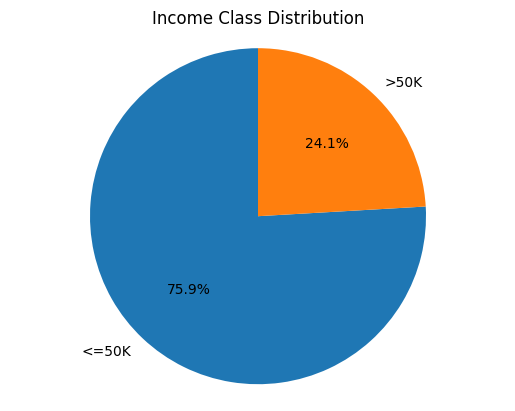

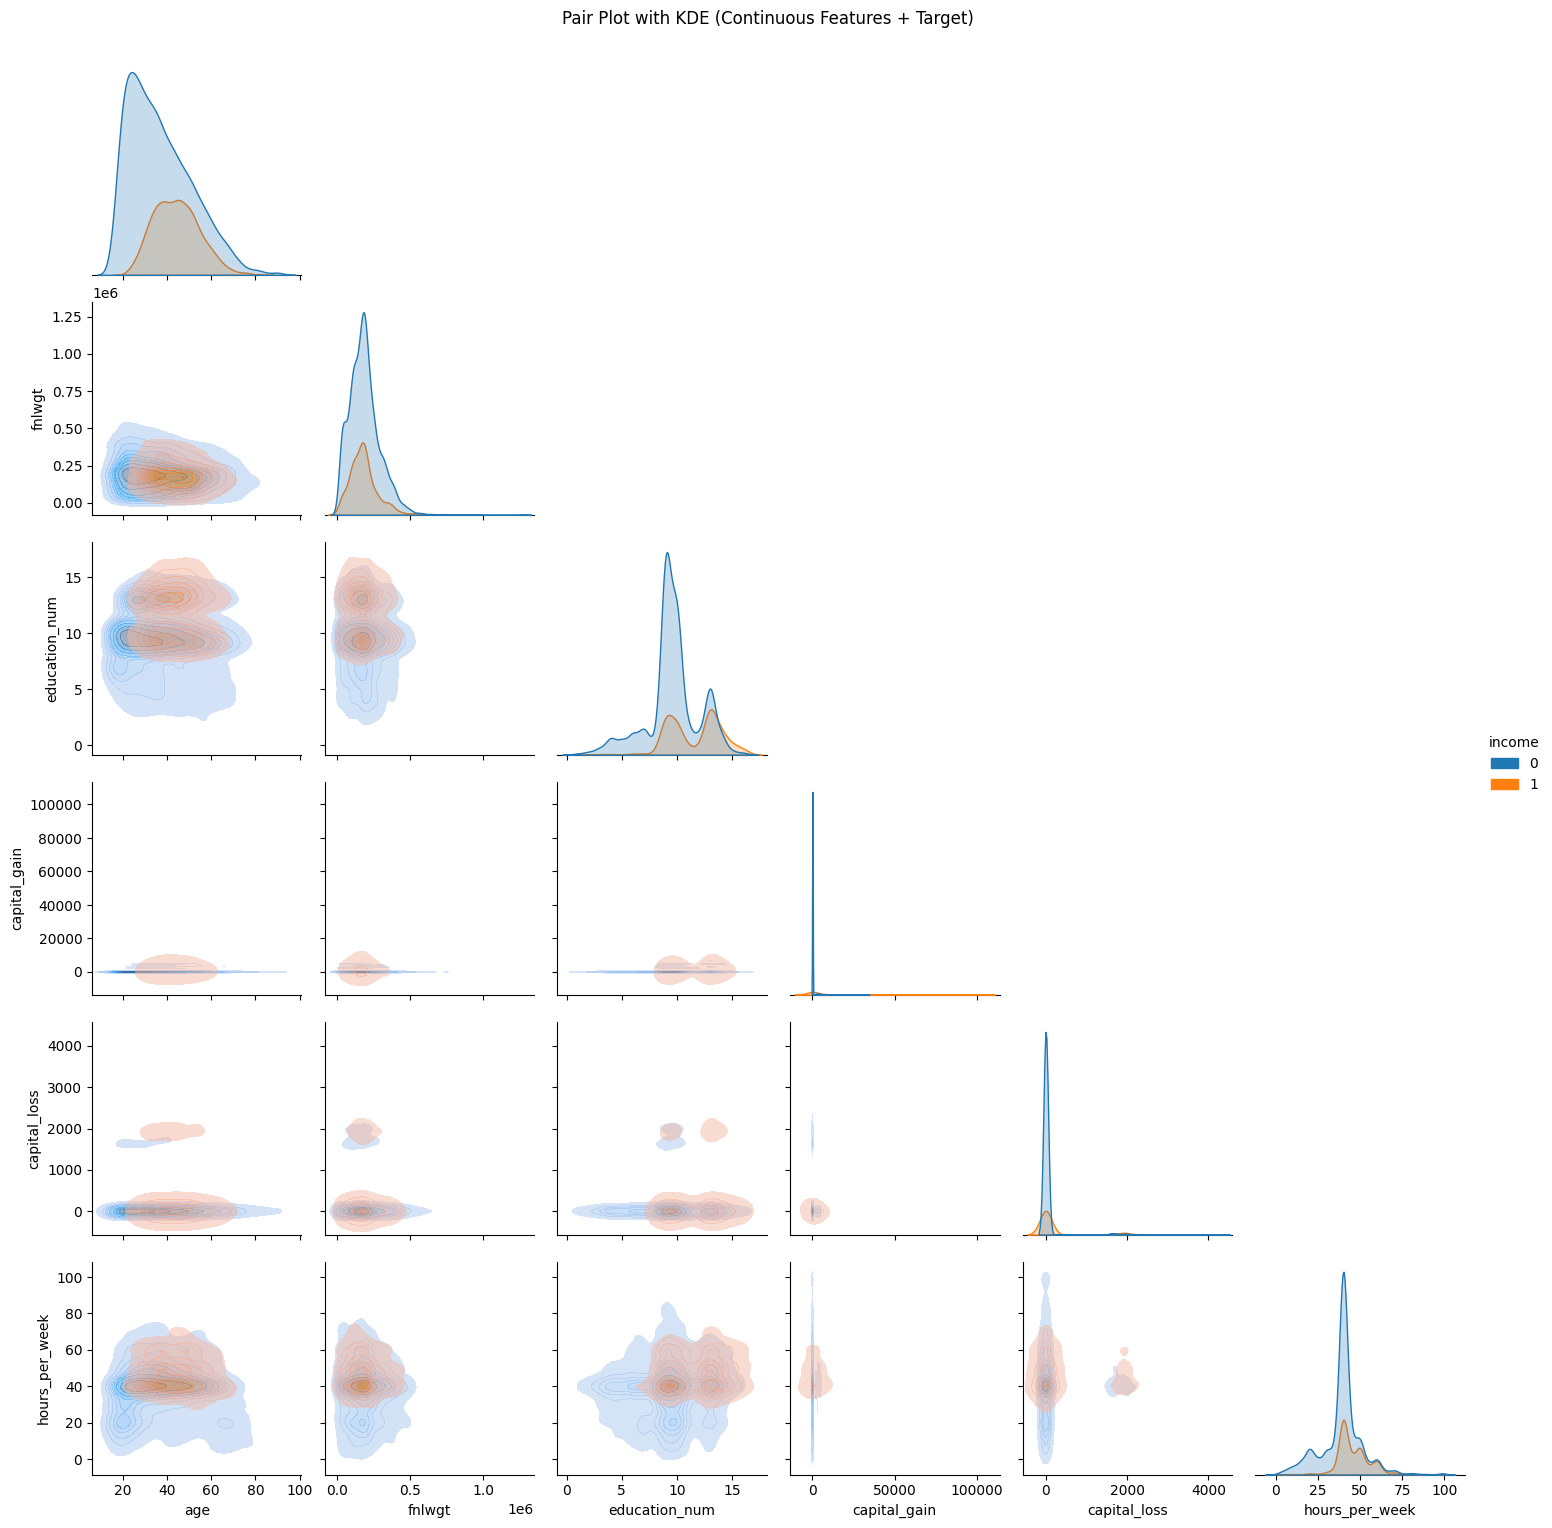

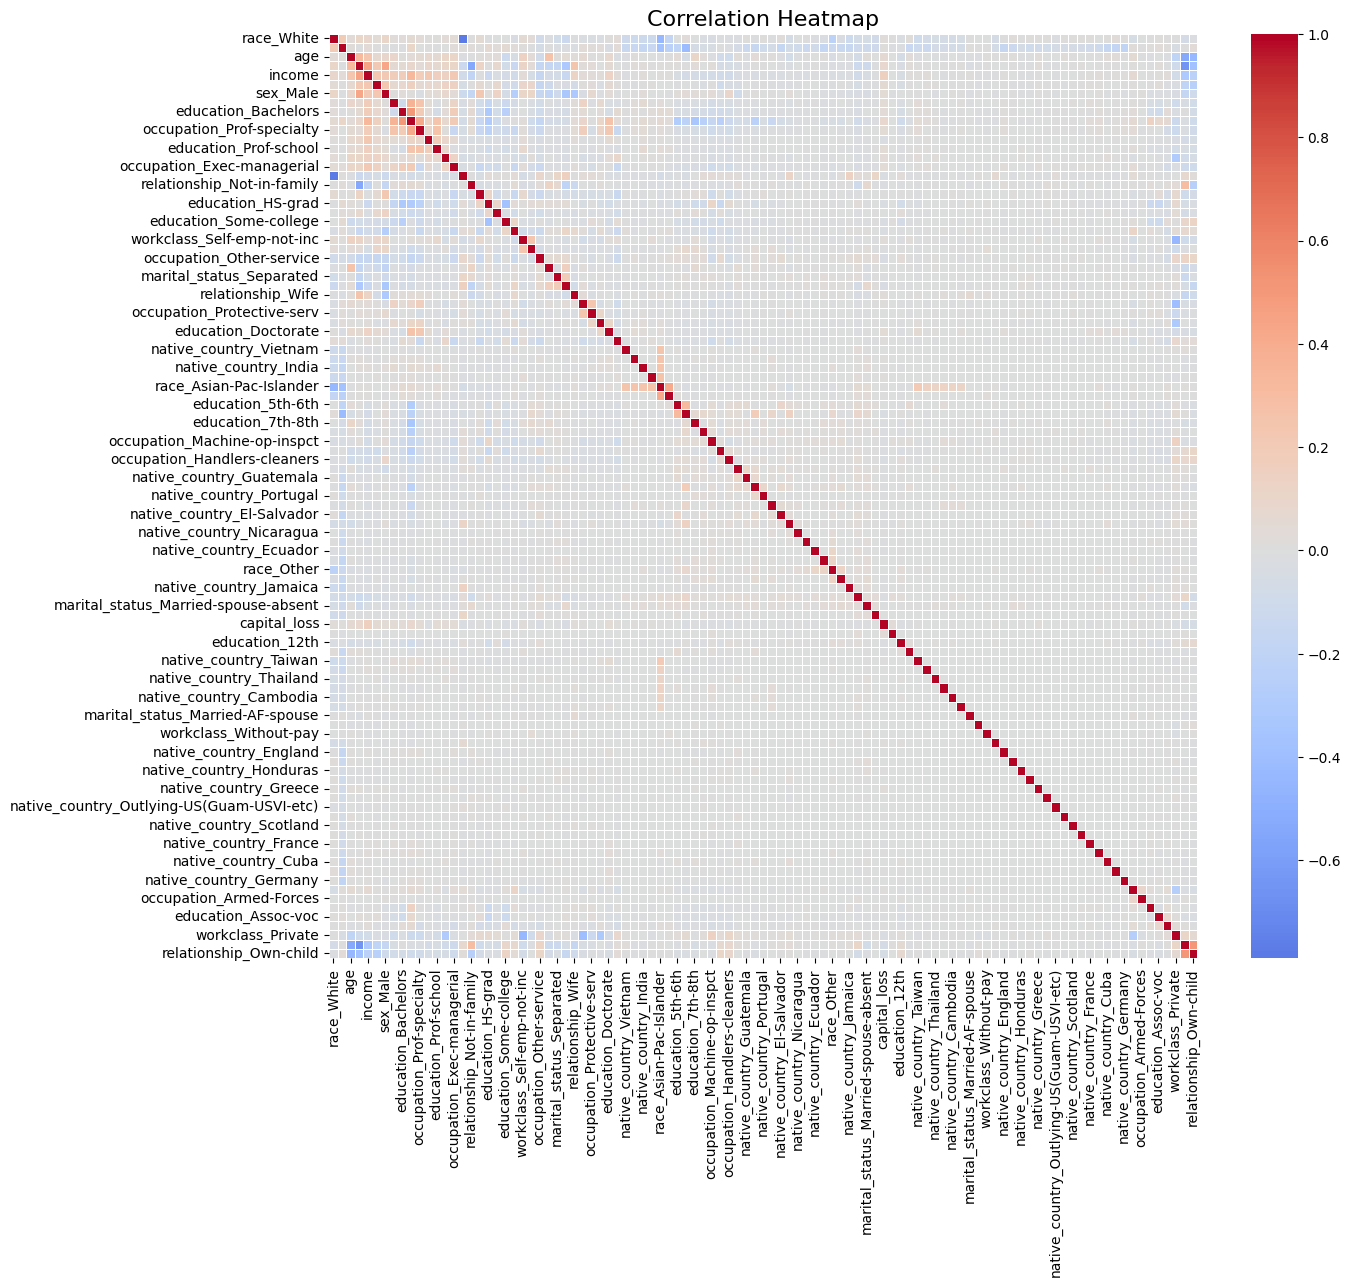

In [6]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list


# Define target
target_col = "income"

# categorical features (remove target)
categorical_cols = adult.select_dtypes(include='object').columns.tolist()
categorical_cols.remove(target_col)

# continous features
continuous_cols = adult.select_dtypes(exclude='object').columns.tolist()

# one-hot encode cat features only
X_cats = pd.get_dummies(adult[categorical_cols], drop_first=True)

# Combine cont + cat features
X_encoded = pd.concat([adult[continuous_cols], X_cats], axis=1)
adult_encoded = X_encoded.copy()
adult_encoded[target_col] = adult[target_col].map({"<=50K": 0, ">50K": 1})

print(adult_encoded.iloc[0])

# pie chart visualization

# count classes
class_counts = adult_encoded["income"].value_counts().sort_index()

# plot pie chart
plt.figure()
plt.pie(
    class_counts,
    labels=["<=50K", ">50K"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Income Class Distribution")
plt.axis("equal")
plt.show()

# pair plot with KDE

continuous_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week", "income"]
sampled = adult_encoded[continuous_features].sample(5000, random_state=42)  # sample for speed

sns.pairplot(sampled, hue="income", corner=True, kind="kde",
             plot_kws={"fill": True, "alpha": 0.5})
plt.suptitle("Pair Plot with KDE (Continuous Features + Target)", y=1.02)
plt.show()

# Correlation heatmap

heatmap_features = adult_encoded.columns
corr = adult_encoded[heatmap_features].corr()

link = linkage(corr, method='average')
cluster_order = leaves_list(link)
clustered_corr = corr.iloc[cluster_order, cluster_order]

plt.figure(figsize=(14, 12))
sns.heatmap(clustered_corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Pie Chart
*   Pretty hefty class imbalance 3:1 ratio of over 50k than under
*   Will definitely need to stratify train/test sets for fair evaluation

Pair Plot with KDE
*   Class separation is strongest for education_num, capital_gain, and hours_per_week: higher values of these features are much more associated with income = 1
*   Capital_gain and capital_loss are highly skewed and mostly zero, but when nonzero they strongly indicate higher income.

Correlation Heatmap
*   No severe multicollinearity among most features: aside from the diagonal, correlations are generally small to moderate
*   Income correlates most with education-related and work-related variables (education level, occupation, hours worked, capital gains)





# Logistic Regression Implementations

### Gradient Descent Variants

**Cost function:**

For logistic regression, the loss is the convex cross-entropy (log loss), so there exists a single global minimum. Convergence differences arise from how accurately each method estimates the true gradient of this loss.

1. Batch Gradient Descent (BGD)
   - Uses the entire training set to compute the gradient at each iteration
   - Convergence: Smooth and stable, with monotonic decrease in loss when the learning rate is appropriate
   - Because the gradient is exact, BGD converges reliably to the global minimum but can be slow due to expensive full-dataset updates

2. Stochastic Gradient Descent (SGD)
   - Uses one sample at a time to compute the gradient
   - Convergence: Noisy and non-monotonic; the loss may fluctuate due to high variance in gradient estimates
   - SGD converges in expectation to the minimum but often oscillates around it unless the learning rate decays

3. Mini-batch Gradient Descent (MBGD)  
   - Uses a small batch of samples to compute the gradient
   - Convergence: Lower variance than SGD but faster per update than BGD, leading to more stable and efficient convergence
   - Larger batches approximate BGD behavior, while smaller batches resemble SGD, allowing a trade-off between stability and speed


In [7]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(
        self,
        learning_rate=0.01,
        n_iter=1000,
        batch_size=1,
        optimizer="sgd",
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        log=False
    ):
        """
        optimizer: 'sgd', 'momentum', 'rmsprop', 'adam'
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.log = log

        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # numerical stability
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = X.shape[0]
        y_pred = self.sigmoid(X @ self.w + self.b)
        eps = 1e-15
        return -(1/m) * np.sum(
            y*np.log(y_pred + eps) + (1-y)*np.log(1-y_pred + eps)
        )

    def gradient(self, X, y):
        m = X.shape[0]
        y_pred = self.sigmoid(X @ self.w + self.b)
        dw = (1/m) * (X.T @ (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        return dw, db

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0

        # optimizer state
        v_w = np.zeros_like(self.w)
        v_b = 0.0
        s_w = np.zeros_like(self.w)
        s_b = 0.0

        t = 0  # timestep for Adam

        for epoch in range(self.n_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled, y_shuffled = X[indices], y[indices]

            for i in range(0, n_samples, self.batch_size): # GD Variant Options*** 1,n,MAX_SIZE
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                dw, db = self.gradient(X_batch, y_batch)

                if self.optimizer == "sgd": # default update rule
                    self.w -= self.learning_rate * dw
                    self.b -= self.learning_rate * db

                elif self.optimizer == "momentum":
                    v_w = self.beta1 * v_w + (1 - self.beta1) * dw
                    v_b = self.beta1 * v_b + (1 - self.beta1) * db
                    self.w -= self.learning_rate * v_w
                    self.b -= self.learning_rate * v_b

                elif self.optimizer == "rmsprop":
                    s_w = self.beta2 * s_w + (1 - self.beta2) * (dw ** 2)
                    s_b = self.beta2 * s_b + (1 - self.beta2) * (db ** 2)
                    self.w -= self.learning_rate * dw / (np.sqrt(s_w) + self.epsilon)
                    self.b -= self.learning_rate * db / (np.sqrt(s_b) + self.epsilon)

                elif self.optimizer == "adam":
                    t += 1
                    v_w = self.beta1 * v_w + (1 - self.beta1) * dw
                    v_b = self.beta1 * v_b + (1 - self.beta1) * db
                    s_w = self.beta2 * s_w + (1 - self.beta2) * (dw ** 2)
                    s_b = self.beta2 * s_b + (1 - self.beta2) * (db ** 2)

                    v_w_hat = v_w / (1 - self.beta1 ** t)
                    v_b_hat = v_b / (1 - self.beta1 ** t)
                    s_w_hat = s_w / (1 - self.beta2 ** t)
                    s_b_hat = s_b / (1 - self.beta2 ** t)

                    self.w -= self.learning_rate * v_w_hat / (np.sqrt(s_w_hat) + self.epsilon)
                    self.b -= self.learning_rate * v_b_hat / (np.sqrt(s_b_hat) + self.epsilon)

            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            if self.log and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X, threshold=0.5):
        return (self.sigmoid(X @ self.w + self.b) >= threshold).astype(int)

    # optimizer algorithms built referencing https://www.geeksforgeeks.org/deep-learning/adam-optimizer/


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


# Train/Test Split (80/20)
X = adult_encoded.drop(columns="income").values
y = adult_encoded["income"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # avoid data leakage


# Train the Different Logistic Regression Models

# Batch
logreg_bgd = LogisticRegressionScratch(learning_rate=0.01, n_iter=500, batch_size=len(X_train_scaled), log=True)
logreg_bgd.fit(X_train_scaled, y_train)

# Stochastic
logreg_sgd = LogisticRegressionScratch(learning_rate=0.01, n_iter=500, batch_size=1, log=True)
logreg_sgd.fit(X_train_scaled, y_train)

# Mini-batch (batch_size=128)
logreg_mbgd = LogisticRegressionScratch(learning_rate=0.01, n_iter=500, batch_size=128, log=True)
logreg_mbgd.fit(X_train_scaled, y_train)


# Evaluate

models = {
    "BGD": logreg_bgd,
    "SGD": logreg_sgd,
    "Mini-Batch": logreg_mbgd
}

print("Evaluation Metrics on Test Set:\n")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")

Epoch 0, Loss: 0.6904
Epoch 100, Loss: 0.5356
Epoch 200, Loss: 0.4733
Epoch 300, Loss: 0.4382
Epoch 400, Loss: 0.4151
Epoch 0, Loss: 0.3543
Epoch 100, Loss: 0.3616
Epoch 200, Loss: 0.3592
Epoch 300, Loss: 0.3554
Epoch 400, Loss: 0.3506
Epoch 0, Loss: 0.4717
Epoch 100, Loss: 0.3178
Epoch 200, Loss: 0.3172
Epoch 300, Loss: 0.3171
Epoch 400, Loss: 0.3170
Evaluation Metrics on Test Set:

BGD:
  Precision: 0.6588
  Recall:    0.6760
  F1-score:  0.6673

SGD:
  Precision: 0.7324
  Recall:    0.5115
  F1-score:  0.6023

Mini-Batch:
  Precision: 0.7394
  Recall:    0.6205
  F1-score:  0.6748



Batch Gradient Descent (BGD) shows the most balanced behavior, achieving moderate precision and recall and a solid F1-score, indicating stable but conservative learning. Stochastic Gradient Descent (SGD) has higher precision but much lower recall, showing that it is more selective and misses a larger fraction of positive income cases. Finally, Mini-batch Gradient Descent provides the best overall trade-off, combining high precision with substantially better recall than SGD, resulting in the highest F1-score and the strongest overall performance among the three.

## Compare Optimizers

In [10]:
optimizers = ["sgd", "momentum", "rmsprop", "adam"]
results = {}

for opt in optimizers:
    model = LogisticRegressionScratch(
        learning_rate=0.01,
        n_iter=100,
        batch_size=1,
        optimizer=opt
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[opt] = {
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

results


{'sgd': {'Precision': 0.6978873239436619,
  'Recall': 0.6320153061224489,
  'F1': 0.6633199464524766},
 'momentum': {'Precision': 0.6816353887399463,
  'Recall': 0.6485969387755102,
  'F1': 0.6647058823529411},
 'rmsprop': {'Precision': 0.7063670411985019,
  'Recall': 0.6014030612244898,
  'F1': 0.6496727523251808},
 'adam': {'Precision': 0.737419945105215,
  'Recall': 0.514030612244898,
  'F1': 0.6057872980082676}}

Running this optimizer simulation reveals some trade-offs between stability and selectivity in specifically vanilla SGD. Standard SGD and SGD with momentum deliver the most balanced results, with similar F1-scores; momentum slightly improves recall, suggesting smoother convergence and better exploration of the loss surface. Next, RMSProp increases precision but at the cost of recall, probably because it has more cautious updates that miss some positive income cases. Adam achieves the highest precision but the lowest recall, making it the most conservative optimizer here. It is the most effective at avoiding false positives, but less effective at capturing all high-income instances. Overall, momentum-based SGD provides the best balance for this task.

# Mini Batch + Optimizer Hyperparameter Grid Search

In [12]:
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [32, 64, 128]

best_results = {}

for opt in ["momentum", "rmsprop", "adam"]:
    best_f1 = 0
    best_config = None

    for lr in learning_rates:
        for bs in batch_sizes:
            print(opt, lr, bs)
            model = LogisticRegressionScratch(
                learning_rate=lr,
                n_iter=100, # low epoch count to speed up training times
                batch_size=bs,
                optimizer=opt,
                log=True
            )
            # use the scaled data for fitting and predicting
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            f1 = f1_score(y_test, y_pred)

            if f1 > best_f1:
                best_f1 = f1
                best_config = (lr, bs)

    best_results[opt] = {
        "Best F1": best_f1,
        "Best LR": best_config[0],
        "Best Batch Size": best_config[1]
    }

best_results

momentum 0.1 32
Epoch 0, Loss: 0.3287
momentum 0.1 64
Epoch 0, Loss: 0.3284
momentum 0.1 128
Epoch 0, Loss: 0.3375
momentum 0.01 32
Epoch 0, Loss: 0.3693
momentum 0.01 64
Epoch 0, Loss: 0.4141
momentum 0.01 128
Epoch 0, Loss: 0.4731
momentum 0.001 32
Epoch 0, Loss: 0.5549
momentum 0.001 64
Epoch 0, Loss: 0.6087
momentum 0.001 128
Epoch 0, Loss: 0.6464
rmsprop 0.1 32
Epoch 0, Loss: 0.7567
rmsprop 0.1 64
Epoch 0, Loss: 0.7212
rmsprop 0.1 128
Epoch 0, Loss: 0.8068
rmsprop 0.01 32
Epoch 0, Loss: 0.4057
rmsprop 0.01 64
Epoch 0, Loss: 0.3720
rmsprop 0.01 128
Epoch 0, Loss: 0.3458
rmsprop 0.001 32
Epoch 0, Loss: 0.3855
rmsprop 0.001 64
Epoch 0, Loss: 0.3895
rmsprop 0.001 128
Epoch 0, Loss: 0.4039
adam 0.1 32
Epoch 0, Loss: 0.5581
adam 0.1 64
Epoch 0, Loss: 0.4371
adam 0.1 128
Epoch 0, Loss: 0.3873
adam 0.01 32
Epoch 0, Loss: 0.3427
adam 0.01 64
Epoch 0, Loss: 0.3394
adam 0.01 128
Epoch 0, Loss: 0.3484
adam 0.001 32
Epoch 0, Loss: 0.4145
adam 0.001 64
Epoch 0, Loss: 0.4618
adam 0.001 128
Epoch

{'momentum': {'Best F1': 0.6743135210288494,
  'Best LR': 0.01,
  'Best Batch Size': 128},
 'rmsprop': {'Best F1': 0.6740561136127468,
  'Best LR': 0.001,
  'Best Batch Size': 128},
 'adam': {'Best F1': 0.6748182419035029,
  'Best LR': 0.01,
  'Best Batch Size': 32}}

The grid search shows that all three adaptive optimizers converge to a very similar peak performance (best F1 ≈ 0.674), showing that the dataset and model capacity create a plateau on achievable performance rather than the optimizer choice alone.

Momentum performs best with a moderate learning rate (0.01) and a large batch size (128). This aligns with momentum’s design: larger batches provide more stable gradient estimates, allowing the velocity term to grow consistent directional updates and converge smoothly.

RMSProp achieves its best result with a smaller learning rate (0.001) and large batch size (128). Since RMSProp rescales gradients using a running average of squared gradients, it gains from using smaller step sizes to avoid overly aggressive updates, especially on features with high variance.

Adam slightly edges out the others with the highest F1 and prefers a smaller batch size (32) and learning rate of 0.01. Adam combines momentum and RMSProp in computing the update. This makes it much more robust to noisy gradient estimates, and explains why it performs best with smaller batches, where gradient noise is higher.

Overall, these results reinforce the theoretical behavior of each optimizer: momentum favors stability in convergence, RMSProp changes learning rate to mitigate drastic fluctuations, and Adam handles noisy updates best (combines and balances the best traits of both algorithms).

# Closing Thoughts

So, after much training and analysis, we observe an average combined metric score of around 0.7. One factor to potentially describe this lower overall result is that logistic regression is a linear classifier, while income prediction in Adult may depend more on non-linear interactions (like education * occupation * age). The dataset is also heavily class-imbalanced, which limits recall–precision tradeoffs. In addition, many categorical features are high-cardinality when one-hot encoded, creating sparsity and weak signals. Moreover, the target variable income is influenced by many unobserved factors (industry, location, job seniority, wealth history). So, many samples near the decision boundary are ambiguous, which places an upper bound on achievable performance.